$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
\let\lra\leftrightarrow
\let\ov\overline
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\PP{{\mathbb P}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\Bb{{\mathbf B}}
\def\Eb{{\mathbf E}}
\def\Fb{{\mathbf F}}
\def\Ub{{\mathbf U}}
\def\Vb{{\mathbf V}}
\def\Ab{{\mathbf A}}
\def\Jb{{\mathbf J}}
\def\xb{{\mathbf x}}
\def\cb{{\mathbf c}}
\def\eb{{\mathbf e}}
\def\nb{{\mathbf n}}
\def\wb{{\mathbf w}}
\def\ub{{\mathbf u}}
\def\ab{{\mathbf a}}
\def\bb{{\mathbf b}}
\def\rb{{\mathbf r}}
\def\vb{{\mathbf v}}
\def\ib{{\mathbf i}}
\def\jb{{\mathbf j}}
\def\kb{{\mathbf k}}
\def\pb{{\mathbf p}}
\def\qb{{\mathbf q}}
\def\Fb{{\mathbf F}}
\def\Cb{{\mathbf C}}
\def\Yb{{\mathbf Y}}
\def\Mb{{\mathbf M}}
\def\Mcal{\mathcal M}
\def\vs{\mathsf v}
\def\as{\mathsf a}
\def\grad{\tn{grad}}
\def\curl{\tn{curl}}
\def\unit{\mathbb 1}
\def\div{\tn{div}}
\def\Im{\tn{Im}}
\def\vol{\tn{vol}}
\def\dd{\tn{d}}
\def\ii{\tn{i}}
\def\phib{\boldsymbol \phi}
\def\psib{\boldsymbol \psi}
\def\rhob{\boldsymbol \rho}
\def\Lamb{\boldsymbol \Lambda}
\def\ts{\tn s}
\def\tA{\tn A}
\def\tc{\tn c}
\def\ti{\tn i}
\def\te{\tn e}
\def\th{\tn h}
\def\tt{\tn t}
\def\tg{\tn g}
\def\tE{\tn E}
\def\tB{\tn B}
\def\td{\tn d}
\def\tb{\tn b}
\newcommand{\fhD}{f_\tn{h}^\tn{D}}
\newcommand{\whD}{w_\tn{h}^\tn{D}}
\newcommand{\nhD}{n_\tn{h}^\tn{D}}
\newcommand{\jhD}{\jb_\tn{h}^\tn{D}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\boldsymbol #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\parfra}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
\newcommand{\gavg}[1]{\left\langle #1 \right\rangle}
\def\dd{\mathrm{d}}
\def\pab{\bold \pa}
\newcommand{\etab}{\boldsymbol{\eta}}
\newcommand{\gavg}[1]{\langle #1 \rangle}
$$

# Using the module `bsplines.py`

Jupyter Notebook written by Stefan Possanner, April 2020

From the doc of `bsplines.py`:

> coding: utf-8

> Copyright 2018 Yaman Güçlü

> Basic module that provides the means for evaluating the B-Splines basis
functions and their derivatives. In order to simplify automatic Fortran code
generation with Pyccel, no object-oriented features are employed.

`bsplines.py` is used to construct finite element bases in STRUPHY.

## Table of contents:

* [Recursive definition of B-splines](#Bsplines)
* [Defining knot sequences, Greville points](#knots)
* [Finding the knot span and evaluating b-splines](#plotting)
* [D-splines with correct indexing](#Dsplines)

In [1]:
import numpy             as np
import matplotlib
import matplotlib.pyplot as plt

import hylife.utilitis_FEEC.bsplines as bsp

## Recursive definition of B-splines <a class="anchor" id="Bsplines"></a> 

The $i$-th __B-spline__ (or N-spline) of degree $p$ is defined by the recurrence relation

$$
\begin{align}
p=0:\qquad N_i^0(x) &= \chi_{ \left[ x_i, x_{i+1} \right[ }(x)\,,
\\[2mm]
p\geq 1:\qquad N_i^p(x) &= w_i^p(x)\, N_i^{p-1}(x) + ( 1 - w_{i+1}^p(x) )\, N_{i+1}^{p-1}(x)\,,
\end{align}
$$

where,

$$
\be
w_i^p (x) = \frac{x-x_i}{x_{i+p}-x_{i}} \hspace{2cm} \,.
\ee
$$

Here, $\chi_{ \left[ x_i, x_{i+1} \right[ }$ is the indicator function on the interval $\left[ x_i, x_{i+1} \right[$. A B-spline of degree $p$ is non-zero on $p+1$ intervals (called elements in the following).

Let us plot the sequence $(N_0^p)_p$ for $0\leq p \leq p_{max}$ on a grid with $x_n = n$, $0\leq n\leq p_{max}+1$:

<IPython.core.display.Javascript object>


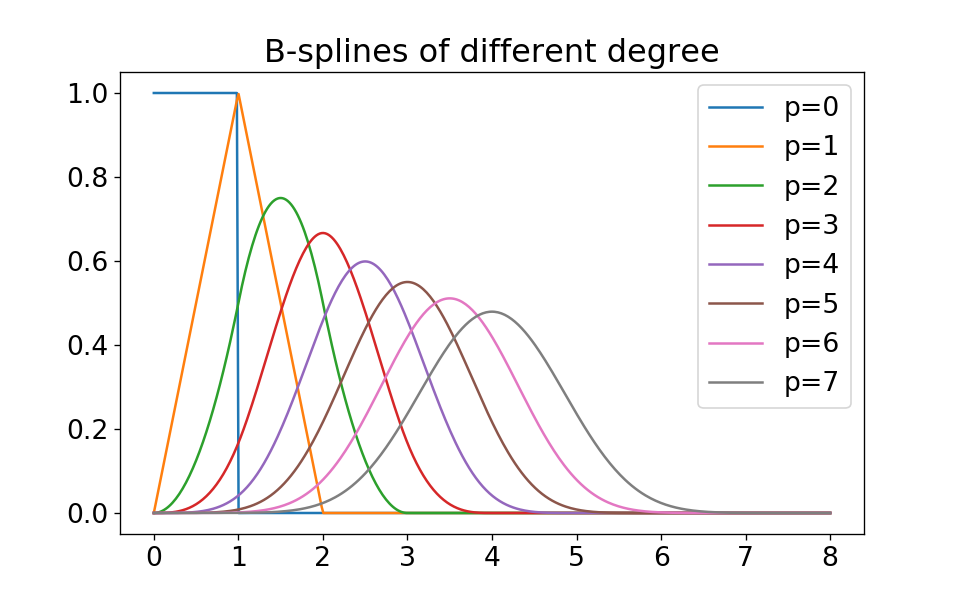

Text(0.5, 1.0, 'B-splines of different degree')

In [2]:
pmax  = 7 # maximum degree
Nel   = pmax + 1 # number of elements
el_b  = np.arange(Nel+1) # element boundaries
x_arr = np.linspace(el_b[0], el_b[-1] , Nel*50) # collocation points

# List of spline functions
N_list = []

# Temporary ist of degree p=0 splines
N = [np.heaviside(-x_arr + 1., 0)]
for q in range(1,Nel):
    N_new = np.heaviside(-x_arr + q + 1., 0) 
    for m in range(1,q+1):
        N_new -= N[q-m]   
    N.append(N_new)

%matplotlib notebook
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

plt.figure(figsize=(8,5))
plt.plot(x_arr, N[0], label='p=0')
N_list.append(N)

for p in range(1, pmax+1):
    N = [] # Temporary ist of degree p splines
    for q in range(Nel-p):
        w0p = (x_arr - el_b[q])/p
        w1p = (x_arr - el_b[q+1])/p
        N.append( w0p*N_list[p-1][q] + (1. - w1p)*N_list[p-1][q+1] )
        
    plt.plot(x_arr, N[0], label='p=' + str(p))
    N_list.append(N)
    
plt.legend()
plt.title('B-splines of different degree')

## Defining knot sequences, Greville points <a class="anchor" id="knots"></a> 

If we divide an interval $[x_0, x_{N_\tn{el}}]$ into `Nel` elements we have `Nel + 1` element boundaries $x_0,x_1,\ldots,x_{N_\tn{el}}$. The knot vectors for both *periodic* and *clamped* splines of degree `p` contains `T.size = Nel + 1 + 2*p` entries. To obtain the knot vector, on each side of the element boundaries vector $(x_i)_i$, $p$ entries are added (see print outs below). The number `nb` of basis functions is:

* periodoc: `nb = T.size - 1 - 2*p = Nel` 
* clamped: `nb = T.size - (p+1) = Nel + p`

Here, `p+1` is the number of elements on which a spline of degree `p` is supported.

In [3]:
Nel = 16   # number of elements
el_b = np.linspace(0., 1., Nel + 1)   # break points (element boundaries)
print(el_b, '\n')
print(el_b.shape)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ] 

(17,)


In [4]:
p = 1   # spline degree
bc = True   # periodic boundary conditions (use 'False' if clamped)
T1 = bsp.make_knots(el_b, p, bc)   # knot sequence
G1 = bsp.greville(T1, p, bc)   # Greville points

#more knot sequences and corresponding Greville points
T2 = bsp.make_knots(el_b, 2, True)  
G2 = bsp.greville(T2, 2, True)

T3 = bsp.make_knots(el_b, 3, True)
G3 = bsp.greville(T3, 3, True)

T4 = bsp.make_knots(el_b, 4, True)
G4 = bsp.greville(T4, 4, True)

T5 = bsp.make_knots(el_b, 5, True)
G5 = bsp.greville(T5, 5, True)

T1c = bsp.make_knots(el_b, 1, False) 
G1c = bsp.greville(T1c, 1, False)

T2c = bsp.make_knots(el_b, 2, False) 
G2c = bsp.greville(T2c, 2, False)

T3c = bsp.make_knots(el_b, 3, False)
G3c = bsp.greville(T3c, 3, False)

T4c = bsp.make_knots(el_b, 4, False)
G4c = bsp.greville(T4c, 4, False)

T5c = bsp.make_knots(el_b, 5, False)
G5c = bsp.greville(T5c, 5, False)

In [5]:
print(T1, '\n')
print(T1.size, '\n')
print(G1, '\n')
print(G1.size)

[-0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125  0.375   0.4375
  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875   0.9375  1.
  1.0625] 

19 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [6]:
print(T1c, '\n')
print(T1c.size, '\n')
print(G1c, '\n')
print(G1c.size)

[0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5
 0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.    ] 

19 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ] 

17


In [7]:
print(T2, '\n')
print(T2.size, '\n')
print(G2, '\n')
print(G2.size)

[-0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125  0.375
  0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875   0.9375
  1.      1.0625  1.125 ] 

21 

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875] 

16


In [8]:
print(T2c, '\n')
print(T2c.size, '\n')
print(G2c, '\n')
print(G2c.size)

[0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375
 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.
 1.    ] 

21 

[0.      0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875
 0.53125 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875 1.     ] 

18


In [9]:
print(T3, '\n')
print(T3.size, '\n')
print(G3, '\n')
print(G3.size)

[-0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125
  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875
  0.9375  1.      1.0625  1.125   1.1875] 

23 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [10]:
print(T3c, '\n')
print(T3c.size, '\n')
print(G3c, '\n')
print(G3c.size)

[0.     0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375
 0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.
 1.     1.     1.    ] 

23 

[0.         0.02083333 0.0625     0.125      0.1875     0.25
 0.3125     0.375      0.4375     0.5        0.5625     0.625
 0.6875     0.75       0.8125     0.875      0.9375     0.97916667
 1.        ] 

19


In [11]:
print(T4, '\n')
print(T4.size, '\n')
print(G4, '\n')
print(G4.size)

[-0.25   -0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25
  0.3125  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125
  0.875   0.9375  1.      1.0625  1.125   1.1875  1.25  ] 

25 

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875] 

16


In [12]:
print(T4c, '\n')
print(T4c.size, '\n')
print(G4c, '\n')
print(G4c.size)

[0.     0.     0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125
 0.375  0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375
 1.     1.     1.     1.     1.    ] 

25 

[0.       0.015625 0.046875 0.09375  0.15625  0.21875  0.28125  0.34375
 0.40625  0.46875  0.53125  0.59375  0.65625  0.71875  0.78125  0.84375
 0.90625  0.953125 0.984375 1.      ] 

20


In [13]:
print(T5, '\n')
print(T5.size, '\n')
print(G5, '\n')
print(G5.size)

[-0.3125 -0.25   -0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875
  0.25    0.3125  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75
  0.8125  0.875   0.9375  1.      1.0625  1.125   1.1875  1.25    1.3125] 

27 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [14]:
print(T5c, '\n')
print(T5c.size, '\n')
print(G5c, '\n')
print(G5c.size)

[0.     0.     0.     0.     0.     0.     0.0625 0.125  0.1875 0.25
 0.3125 0.375  0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875
 0.9375 1.     1.     1.     1.     1.     1.    ] 

27 

[0.     0.0125 0.0375 0.075  0.125  0.1875 0.25   0.3125 0.375  0.4375
 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.925  0.9625 0.9875
 1.    ] 

21


## Finding the knot span and evaluating b-splines <a class="anchor" id="plotting"></a>

The functions `find_span` and `basis_funs` must be called only at a single point $x_0$, not an array of points. 

> For a degree $p$, the __knot span index $i$__ identifies the indices $[i-p:i]$ of all
    $p+1$ non-zero basis functions at a given location $x$.
    
 If we want to evaluate splines we must first call `find_span` and then pass the output as an argument to `basis_funs`.

In [15]:
#testing knot_span
x_arr = np.linspace(el_b[0], el_b[1], 100)
x0 = x_arr[50]

TS1 = bsp.find_span(T1, 1, x0)
TS2 = bsp.find_span(T2, 2, x0)
TS3 = bsp.find_span(T3, 3, x0)
print(np.arange(TS1-1, TS1+1))
print(np.arange(TS2-2, TS2+1))
print(np.arange(TS3-3, TS3+1))

[0 1]
[0 1 2]
[0 1 2 3]


<IPython.core.display.Javascript object>


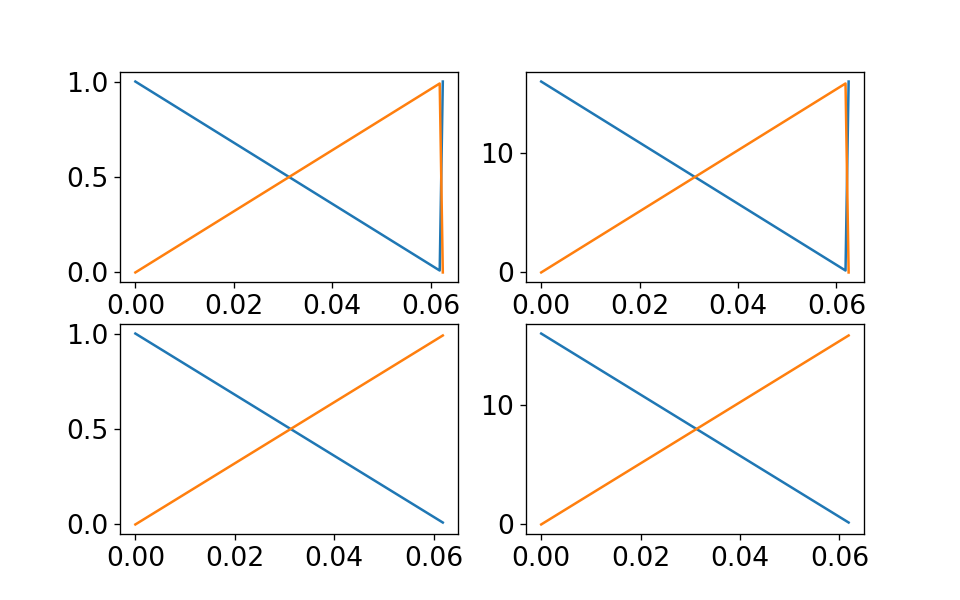

In [16]:
#spline degree p=1
val_arr   = np.zeros( (x_arr.size, 1+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS1 = bsp.find_span(T1, 1, x)
    val_arr[i, :]   = bsp.basis_funs(T1, 1, x, TS1)
    val_arr_n[i, :] = bsp.basis_funs(T1, 1, x, TS1, normalize=True)

plt.figure(figsize=(8,5))
plt.subplot(221)
plt.plot(x_arr, val_arr)
plt.subplot(222)
plt.plot(x_arr, val_arr_n)
plt.subplot(223)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(224)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

<IPython.core.display.Javascript object>


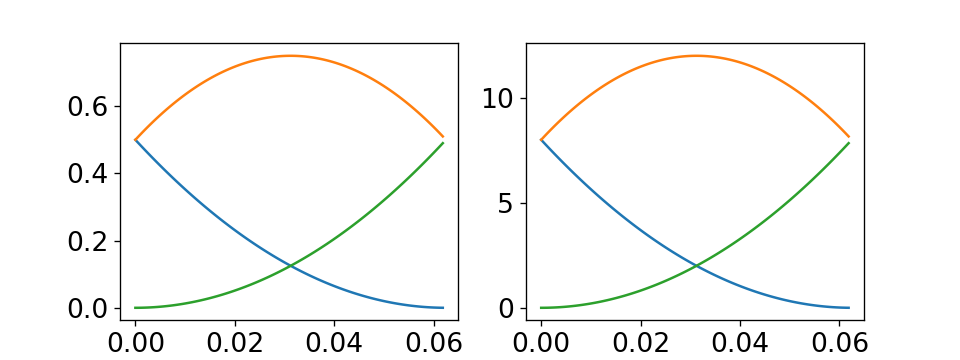

In [17]:
#spline degree p=2
val_arr = np.zeros( (x_arr.size, 2+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS2 = bsp.find_span(T2, 2, x)
    val_arr[i, :]   = bsp.basis_funs(T2, 2, x, TS2)
    val_arr_n[i, :] = bsp.basis_funs(T2, 2, x, TS2, normalize=True)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

<IPython.core.display.Javascript object>


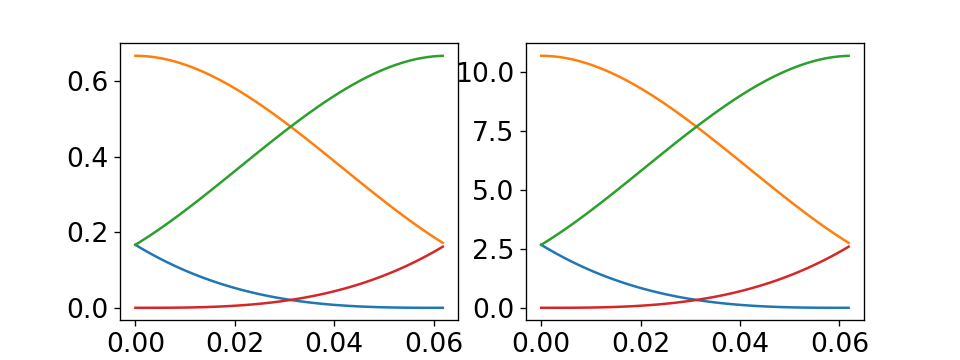

In [18]:
#spline degree p=3
val_arr = np.zeros( (x_arr.size, 3+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS3 = bsp.find_span(T3, 3, x)
    val_arr[i, :]   = bsp.basis_funs(T3, 3, x, TS3)
    val_arr_n[i, :] = bsp.basis_funs(T3, 3, x, TS3, normalize=True)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

<IPython.core.display.Javascript object>


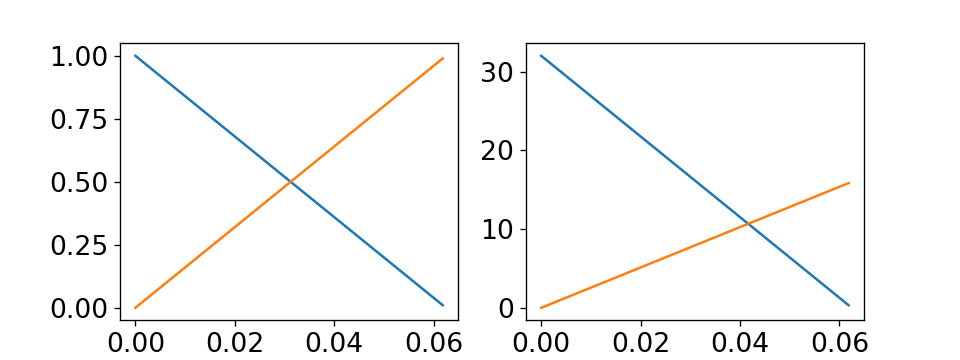

In [19]:
#spline degree p=1, clamped
val_arr   = np.zeros( (x_arr.size, 1+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS1 = bsp.find_span(T1c, 1, x)
    val_arr[i, :]   = bsp.basis_funs(T1c, 1, x, TS1)
    val_arr_n[i, :] = bsp.basis_funs(T1c, 1, x, TS1, normalize=True)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

<IPython.core.display.Javascript object>


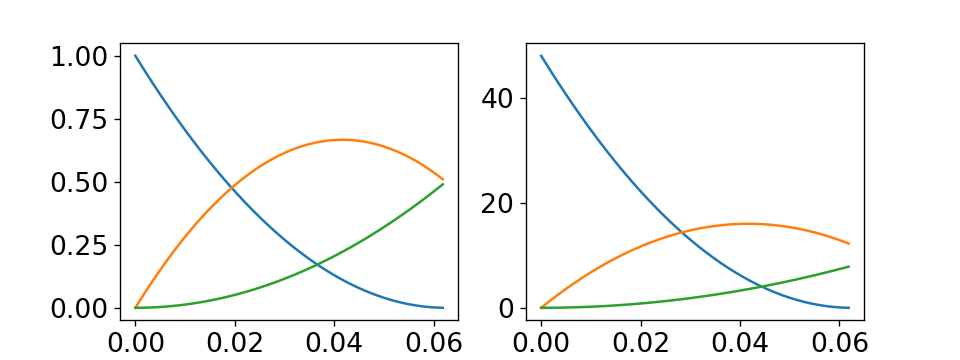

In [20]:
#spline degree p=2, clamped
val_arr = np.zeros( (x_arr.size, 2+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS2 = bsp.find_span(T2c, 2, x)
    val_arr[i, :]   = bsp.basis_funs(T2c, 2, x, TS2)
    val_arr_n[i, :] = bsp.basis_funs(T2c, 2, x, TS2, normalize=True)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

<IPython.core.display.Javascript object>


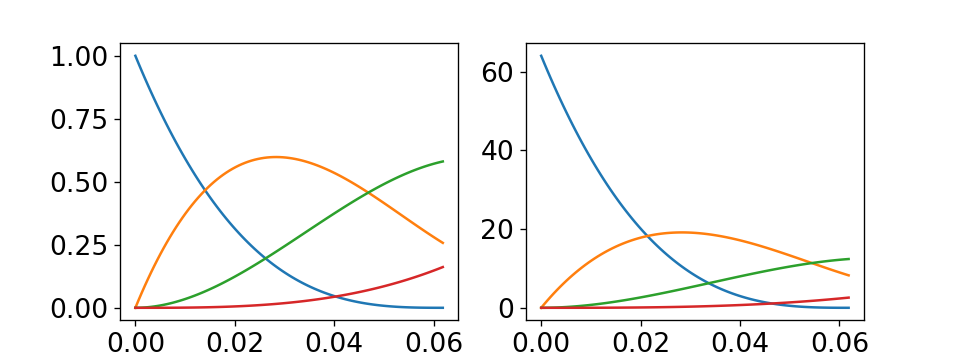

In [21]:
#spline degree p=3, clamped
val_arr = np.zeros( (x_arr.size, 3+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS3 = bsp.find_span(T3c, 3, x)
    val_arr[i, :]   = bsp.basis_funs(T3c, 3, x, TS3)
    val_arr_n[i, :] = bsp.basis_funs(T3c, 3, x, TS3, normalize=True)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

## D-splines with correct indexing <a class="anchor" id="Dsplines"></a>

A key point for constructing commuting diagrams comes from the recursion formula for the derivatives:

$$
\be \label{N'}
 ({N_i^p})'(x) = D_i^{p}(x)-D_{i+1}^{p}(x)\,,
\ee
$$

where we introduced the __D-splines__ of degree $p$ as

$$
\be \label{def:D}
 D_{i}^{p}(x)=p\frac{N_i^{p-1}(x)}{x_{i+p}-x_i}\,.
\ee
$$

The D-splines can thus be constructed just as N-splines with the function `make_knots`. The normalization factor $p/(x_{i+p}-x_i)$ is enabled by setting the option `normalize=True` when available, as for instance in the functions `basis_funs`, `collocation_matrix` and `histopolation_matrix`.

A set of N- and D-splines to be used for constructing commuting diagrams thus contains splines $(N_i^p)_i$ and $(N_i^{p-1})_i$. __Special care must be taken to get the indexing right.__ From the function `find_span` we can find out the indexing of B-splines in `bsplines.py`:

In [22]:
# spline indexing from find_span
TS1  = bsp.find_span(T1,  1, T1[0])
TS1c = bsp.find_span(T1c, 1, T1c[0])
print(np.arange(TS1-1, TS1+1))
print(np.arange(TS1c-1, TS1c+1))

[0 1]
[0 1]


In [23]:
# spline indexing from find_span
TS2  = bsp.find_span(T2,  2, T2[0])
TS2c = bsp.find_span(T2c, 2, T2c[0])
print(np.arange(TS2-2, TS2+1))
print(np.arange(TS2c-2, TS2c+1))

[0 1 2]
[0 1 2]


In [24]:
# spline indexing from find_span
TS3  = bsp.find_span(T3,  3, T3[0])
TS3c = bsp.find_span(T3c, 3, T3c[0])
print(np.arange(TS3-3, TS3+1))
print(np.arange(TS3c-3, TS3c+1))

[0 1 2 3]
[0 1 2 3]


This means that the spline with index `i=0` is the one "originating" at the first knot `Tp[0]` (or `Tpc[0]` for clamped splines). However, we know that `Tp` is different for different degrees, in particular `T(p-1)[0] = Tp[1]`:

In [25]:
el_b

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    ])

In [26]:
T1

array([-0.0625,  0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,
        0.375 ,  0.4375,  0.5   ,  0.5625,  0.625 ,  0.6875,  0.75  ,
        0.8125,  0.875 ,  0.9375,  1.    ,  1.0625])

In [27]:
T2

array([-0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,
        0.3125,  0.375 ,  0.4375,  0.5   ,  0.5625,  0.625 ,  0.6875,
        0.75  ,  0.8125,  0.875 ,  0.9375,  1.    ,  1.0625,  1.125 ])

In [28]:
T3

array([-0.1875, -0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,  0.1875,
        0.25  ,  0.3125,  0.375 ,  0.4375,  0.5   ,  0.5625,  0.625 ,
        0.6875,  0.75  ,  0.8125,  0.875 ,  0.9375,  1.    ,  1.0625,
        1.125 ,  1.1875])

In [29]:
T1c

array([0.    , 0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 ,
       0.4375, 0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 ,
       0.9375, 1.    , 1.    ])

In [30]:
T2c

array([0.    , 0.    , 0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125,
       0.375 , 0.4375, 0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125,
       0.875 , 0.9375, 1.    , 1.    , 1.    ])

In [31]:
T3c

array([0.    , 0.    , 0.    , 0.    , 0.0625, 0.125 , 0.1875, 0.25  ,
       0.3125, 0.375 , 0.4375, 0.5   , 0.5625, 0.625 , 0.6875, 0.75  ,
       0.8125, 0.875 , 0.9375, 1.    , 1.    , 1.    , 1.    ])

### Periodic boundary conditions

Suppose $(N_i^p)_i$ is the set of N-splines with $i=0,\ldots, N_0-1$ as created from the knot vector `Tp` obtained via `make_knots(el_b, p, True)`. Moreover, suppose $(D_{i}^p)_{i}$ is the set of D-splines with $i=0,\ldots, N_0-1$ as created from the knot vector `T(p-1)` obtained via `make_knots(el_b, p-1, True)`. Due to the index shift by 1 in the knot vectors between $p$ and $p-1$, the formula for the derivative with indexing from `bsplines.py` reads

$$
\be
 ({N_i^p})'(x) = D_{i-1}^{p}(x)-D_{i}^{p}(x)\,.
\ee
$$

Taking the derivative of

$$
\be
 f_h(x) = \sum_{i=0}^{N_0-1} f_i\,N_i^p(x)\,,
\ee
$$

thus yields

$$
\be
 f_h'(x) = \sum_{i=0}^{N_0-1} f_i\,(N_i^p)'(x) = \sum_{i=0}^{N_0-1} f_i\,(D_{i-1}^{p}(x)-D_{i}^{p}(x)) = \sum_{i=0}^{N_0-1} (f_{i+1} - f_i)\,D_{i}^{p}(x)\,.
\ee
$$

The 1D gradient matrix is thus an $N_0\times N_0$-matrix of the form

$$
\be
 \GG = \begin{pmatrix}
 -1 & 1 &  &  & 
 \\
  & -1 & 1 &  & 
 \\
  &  & \ddots & \ddots & 
 \\
  &  &  & -1 & 1
 \\
 1 &  &  &  & -1
 \end{pmatrix} \,.
\ee
$$


### Dirichlet boundary conditions

Suppose $(N_i^p)_i$ is the set of N-splines with $i=0,\ldots, N_0-1$ as created from the knot vector `Tpc` obtained via `make_knots(el_b, p, False)`. Moreover, suppose $(D_{i}^p)_{i}$ is the set of D-splines with $i=0,\ldots, N_0-2$, as created from the knot vector `T(p-1)c` obtained via `make_knots(el_b, p-1, False)`. Due to the index shift by 1 in the knot vectors between $p$ and $p-1$, the formula for the derivative with indexing from `bsplines.py` reads

$$
\be
 ({N_i^p})'(x) = 
 \left\{
 \begin{aligned}
 -D_{0}^{p}(x) \quad &\tn{for}\ i=0 \,,
 \\[1mm]
 D_{i-1}^{p}(x)-D_{i}^{p}(x) \quad &\tn{for}\ 0< i < N_0-1 \,,
 \\[1mm]
 D_{N_0-2}^{p}(x) \quad &\tn{for}\ i=N_0-1 \,,
 \end{aligned}
 \right. \,.
\ee
$$

Taking the derivative of

$$
\be
 f_h(x) = \sum_{i=0}^{N_0-1} f_i\,N_i^p(x)\,,
\ee
$$

thus yields

$$
\be
\begin{aligned}
 f_h'(x) &= \sum_{i=0}^{N_0-1} f_i\,(N_i^p)'(x)
 \\[2mm]
 &= -f_0\,D_{0}^{p}(x) + \sum_{i=1}^{N_0-2} f_i\,(D_{i-1}^{p}(x)-D_{i}^{p}(x)) +  f_{N_0-1}\,D_{N_0-2}^{p}(x)
 \\[2mm]
 &= (f_1-f_0)\,D_{0}^{p}(x) + \sum_{i=1}^{N_0-3} (f_{i+1} - f_i)\,D_{i}^{p}(x) +  (f_{N_0-1} - f_{N_0-2})\,D_{N_0-2}^{p}(x)\,.
\end{aligned}
\ee
$$

The 1D gradient matrix is thus an $(N_0-1)\times N_0$-matrix of the form

$$
\be
 \GG = \begin{pmatrix}
 -1 & 1 &  &  & &
 \\
  & -1 & 1 &  & &
 \\
  &  & \ddots & \ddots & &
 \\
  &  &  & -1 & 1 &
 \\
  &  &  &  & -1 & 1
 \end{pmatrix} \,.
\ee
$$